<a href="https://colab.research.google.com/github/jcandane/PhysicsI_Labs/blob/main/phy132_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# $\mathcal{B}$-field

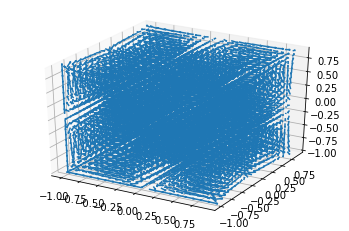

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm

## the def. takes domain (X,Y,Z), charge Q, particle-coordinates R -> E
π = np.pi

# Make the grid/"domain"
r = np.arange(-1, 1, 0.1)
X, Y, Z = np.meshgrid(r, r, r)



# Make the direction data for the arrows/"making up the field"
BxXYZ =  np.sin(π * X) * np.cos(π * Y) * np.cos(π * Z)
ByXYZ = -np.cos(π * X) * np.sin(π * Y) * np.cos(π * Z)
BzXYZ =  np.sqrt(2 / 3) * np.cos(π * X) * np.cos(π * Y) * np.sin(π * Z)

ax = plt.figure().add_subplot(projection='3d')
ax.quiver(X, Y, Z, BxXYZ, ByXYZ, BzXYZ, length=0.1, normalize=True)
plt.show()

(3, 20, 20, 20)


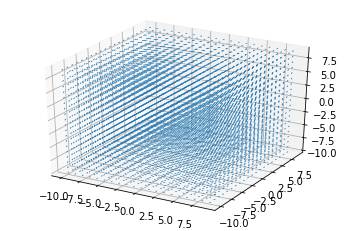

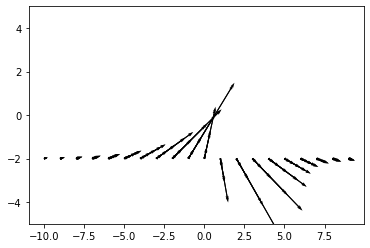

In [ ]:
# Make the grid/"domain"
x0 = np.array([0.55, 0.55, 0.55])

r = np.arange(-10, 10, 1)
X, Y, Z = np.meshgrid(r, r, r)

R = np.array([X, Y, Z])
print(R.shape)

B = np.linalg.norm(R, axis=0)

## orintation of the moment μ (z-direction) and position x and scalar s
R = R - x0[:,None, None, None]
B_xXYZ = (R * (R[0] / np.linalg.norm(R, axis=0)**5)[None, :, :, :] )
B_xXYZ[2] -= 1/np.linalg.norm(R, axis=0)**3

ax = plt.figure().add_subplot(projection='3d')
ax.quiver(X, Y, Z, B_xXYZ[0], B_xXYZ[1], B_xXYZ[2], length=0.1, normalize=True)
plt.show()

s = 8
plt.quiver(X[s], Y[s], B_xXYZ[0,s], B_xXYZ[1,s])
plt.ylim([-5,5])
plt.show()

# Now Let's get the Magnetic Field for a Pure Dipole

$B_{\hat{x}} = \frac{\mu}{4\pi \varepsilon _0}\frac{1}{c^2} \frac{3 XZ }{R^5}$

$B_{\hat{y}} = \frac{\mu}{4\pi \varepsilon _0}\frac{1}{c^2} \frac{3 YZ }{R^5}$

$B_{\hat{z}} = \frac{\mu}{4\pi \varepsilon _0}\frac{1}{c^2} \frac{3 Z Z }{R^5} - \frac{\mu}{4\pi \varepsilon _0}\frac{1}{c^2} \frac{1}{R^3} $

alt. def.: $B_{\hat{z}} = -\frac{\mu}{4\pi \varepsilon _0}\frac{1}{c^2} \left( \frac{1}{R^3} - \frac{3 Z^2 }{R^5}\right)$


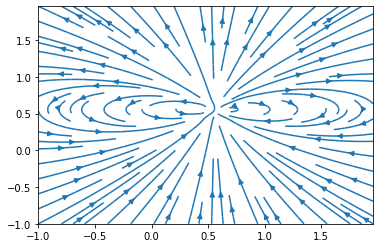

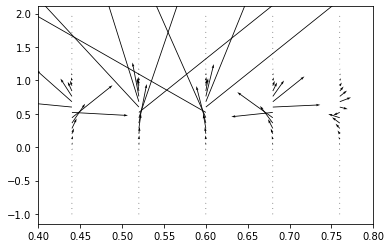

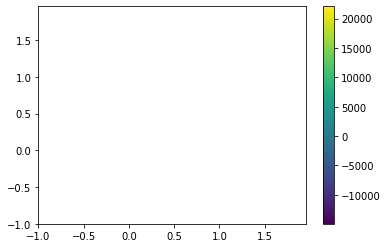

In [ ]:
# Make the grid/"domain"
x0   = np.array([0.555, 0.555]) ## dipole location
C    = 10.0

r    = np.arange(-1, 2, 0.08)
Y, Z = np.meshgrid(r, r)
R    = np.array([Y, Z])

δR   = R - x0[:,None, None]
R    = np.linalg.norm(δR, axis=0)

By   = C * δR[0]*δR[1] / R**5
Bz   = C * δR[1]*δR[1] / R**5 - 1 / R**3

plt.streamplot(Y, Z, By, Bz)
plt.show()

plt.quiver(Y, Z, (By), (Bz))
plt.xlim([0.4,0.8])
plt.xlim([0.4,0.8])
plt.show()

# Make the plot
plt.pcolormesh(X, Y, div( np.array([By, Bz]) ), shading='auto')
plt.colorbar()
plt.show()

## Now 3D version

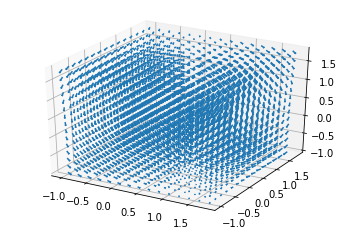

In [ ]:
# Make the grid/"domain"
x0   = np.array([0.555, 0.555, 0.555]) ## dipole location
C    = 5.5

r    = np.arange(-1, 2, 0.2)
X, Y, Z = np.meshgrid(r, r, r)
R    = np.array([X, Y, Z])

δR   = R - x0[:,None, None, None]
R    = np.linalg.norm(δR, axis=0)

Bx   = C * δR[0]*δR[2] / R**5
By   = C * δR[1]*δR[2] / R**5
Bz   = C * δR[2]*δR[2] / R**5 - C / R**3

ax = plt.figure().add_subplot(projection='3d')
ax.quiver(X, Y, Z, Bx, By, Bz, length=0.1, normalize=True)
plt.show()

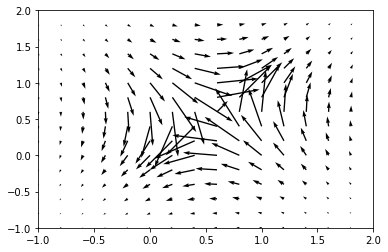

In [ ]:
s = 11
#plt.quiver(X[s], Y[s], Bx[s], By[s])
#plt.show()

plt.quiver(X[:,:,s], Y[:,:,s], By[:,:,s], Bx[:,:,s])
plt.xlim([-1,2])
plt.ylim([-1,2])
plt.show()

# Wire 

\begin{align*}
    \mathcal{B}_{\hat{x}} &= -\frac{I}{2\pi\varepsilon_0} \frac{1}{c^2} \frac{Y}{ \left( \sqrt{X^2 + Y^2} \right)^{2} } \\
    \mathcal{B}_{\hat{y}} &= +\frac{I}{2\pi\varepsilon_0} \frac{1}{c^2} \frac{X}{ \left( \sqrt{X^2 + Y^2} \right)^{2} } \\
    \mathcal{B}_{\hat{z}} &= 0.
\end{align*}

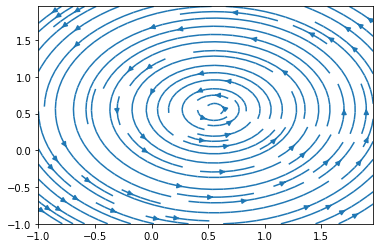

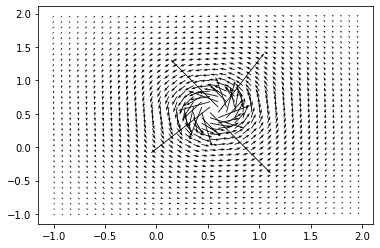

In [ ]:
# Make the grid/"domain"
x0   = np.array([0.555, 0.555]) ## dipole location
C    = 5.5 ## I / ( 2πε_0 )

r    = np.arange(-1, 2, 0.08)
X, Y = np.meshgrid(r, r)
R    = np.array([X, Y])

δR   = R - x0[:,None, None]
R    = np.linalg.norm(δR, axis=0)

Bx   = - C * δR[1] / R**2
By   = + C * δR[0] / R**2

plt.streamplot(X, Y, Bx, By)
plt.show()

plt.quiver(X, Y, Bx, By)
plt.show()

## Curl & Divergence

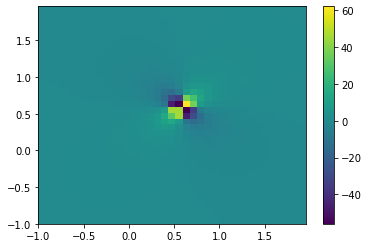

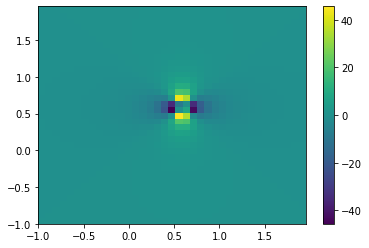

In [ ]:
def div(v):
    """
    Given a Vector Field get a Scalar Field
    """
    divergence = np.zeros(list(v.shape)[1:], dtype=v.dtype)
    for i in range(len(v)):
        divergence += np.gradient(v[i], axis=i)
    return divergence

def curl(v):
    """
    Assumes 2D or 3D Vector Field
    """
    if len(v) == 2:
        ### This gets a Scalar Field
        curl    = np.zeros(list(v.shape)[1:], dtype=v.dtype)
        curl    = np.gradient(v[0], axis=1) - np.gradient(v[1], axis=0)
        return curl
    if len(v) == 3:
        curl    = np.zeros(v.shape, dtype=v.dtype)
        curl[0] = np.gradient(v[2], axis=1) - np.gradient(v[1], axis=2)
        curl[1] = np.gradient(v[0], axis=2) - np.gradient(v[2], axis=0)
        curl[2] = np.gradient(v[1], axis=0) - np.gradient(v[0], axis=1)
        return curl
    else:
        return None


v = np.asarray([Bx, By])

# Make the plot
plt.pcolormesh(X, Y, curl(v), shading='auto')
plt.colorbar()
plt.show()

# Make the plot
plt.pcolormesh(X, Y, div(v), shading='auto')
plt.colorbar()
plt.show()

# Magnetic Dipole field from Neutron (of some particle, just good units)

# Get 3D Vector Field for a wire

In [ ]:
B_3coil = np.zeros((3, len(By), len(By), len(By)))

for i in range(len(By)):
    B_3coil[0,:,:,i] = Bx
    B_3coil[1,:,:,i] = By

## 3D plot this guy

## 3D B-field of two wires different axis

## 3D plot this guy

array([[ 1.76848875,  1.86180924,  1.95976215, ...,  2.15534078,
         2.0491656 ,  1.94726836],
       [ 1.76602484,  1.86440678,  1.96826514, ...,  2.17747239,
         2.063593  ,  1.95498416],
       [ 1.7581146 ,  1.86151177,  1.97132616, ...,  2.19461964,
         2.07272433,  1.95724544],
       ...,
       [-1.7256587 , -1.83793432, -1.95863904, ..., -2.20883534,
        -2.07145342, -1.94307686],
       [-1.74607358, -1.85373609, -1.96871665, ..., -2.20455886,
        -2.0754717 , -1.9539367 ],
       [-1.75942897, -1.86220525, -1.97127588, ..., -2.19278955,
        -2.07191023, -1.95729537]])

# Build 2D cross-section of Coil

Get magentic field in the center of this coil

In [ ]:
## slice to get the magentic field at the center of your coil
## either sample (take a few points, your choice) and compare them
## this also may be done by slicing this array, e.g. Bx[14:28,13:16]



array([[ 5.26460557,  6.32183908,  7.58921491],
       [ 4.99041534,  6.19349722,  7.74647887],
       [ 4.43743582,  5.71077969,  7.50061989],
       [ 3.5366859 ,  4.71947195,  6.53764096],
       [ 2.27150296,  3.1242282 ,  4.54219031],
       [ 0.722462  ,  1.01076398,  1.51277014],
       [-0.92609916, -1.29411765, -1.93283873],
       [-2.44792594, -3.35611423, -4.85351218],
       [-3.66965012, -4.87567568, -6.7093127 ],
       [-4.5244624 , -5.79589573, -7.56332931],
       [-5.03827331, -6.22577144, -7.74349084],
       [-5.28332434, -6.32020658, -7.55284678],
       [-5.33881853, -6.21168119, -7.18909498],
       [-5.27128713, -5.99279604, -6.76252413]])

# Interpolation

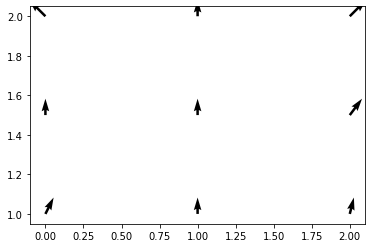

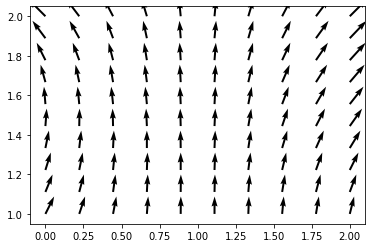

array([[0. , 1. ],
       [0. , 2. ],
       [1. , 1. ],
       [1. , 2. ],
       [2. , 1. ],
       [2. , 2. ],
       [0. , 1.5],
       [1. , 1.5],
       [2. , 1.5]])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

x = [0, 0, 1, 1, 2, 2, 0, 1, 2]
y = [1, 2, 1, 2, 1, 2, 1.5, 1.5, 1.5]
u = [0.5, -1, 0, 0, 0.25, 1, 0, 0, 0.75]
v = [1, 1, 1, 1, 1, 1, 1, 1, 1]

plt.figure(1)
plt.quiver(x, y, u, v)
plt.show()

xx = np.linspace(0, 2, 10)
yy = np.linspace(1, 2, 10)
xx, yy = np.meshgrid(xx, yy)
R = np.asarray( np.meshgrid(xx, yy) )

old_domain = np.transpose(np.vstack((x, y)))
u_interp = interpolate.griddata(old_domain, u, (xx, yy), method='cubic') ## xx, yy, u is the function....
v_interp = interpolate.griddata(old_domain, v, (xx, yy), method='cubic')

plt.figure(2)
plt.quiver(xx, yy, u_interp, v_interp)
plt.show()

interpolate.griddata(old_domain, u, (1, 1.1), method='cubic'), interpolate.griddata(old_domain, v, (1.9, 1.01), method='cubic')

np.array([x, y]).T

\begin{align*}
\mathcal{B}_{zXYZ} &= \frac{1}{4\pi ɛ_0} \frac{1}{c^2} \sum_{s} \frac{I_{sx} \times R_{xXYZ}}{|R_{yXYZ}|^3}\,ds
\end{align*}
$ds$ is the spacing/increment to discretize the parameteric Helix coordinates ($r$ being the Helix radius, $c$ being the winding density), 
\begin{align*}
I &= 
\begin{pmatrix}
r \cos{t} \\
r \sin{t} \\
ct
\end{pmatrix}, \\
t &= \texttt{np.arange(}t_\text{min}, \,t_\text{max}, \,ds)
\end{align*}
I recommend rearranging:
\begin{align*}
I_{sx} ⟶ I_{sxy} &= \begin{pmatrix} 0 & -I_{s\hat{z}} & I_{s\hat{y}} \\ I_{s\hat{z}} & 0 & -I_{s\hat{x}} \\ -I_{s\hat{y}} & I_{s\hat{x}} & 0 \end{pmatrix}
\end{align*}
such that, we get the magnetic field at a grid point $(\hat{X},\hat{Y},\hat{Z})$, note that :
\begin{align*}
\mathcal{B}_{x\hat{X}\hat{Y}\hat{Z}} &= \frac{1}{4\pi ɛ_0} \frac{1}{c^2} \sum_{s} \frac{I_{sxy} R_{yXYZ}}{|R_{yXYZ}|^3}\,ds
\end{align*}